# Analysis on a gasification system's size
What is the correlation between a system's size in terms of power?
 (e.g. kW, MW, kWel, or kWth) and feedstock input in terms of mass/energy (e.g. tonnes/year or kg/hour OR kWh/year or kWh/hour).

In [1]:
# Import requirements and initialise Dataframe to store data in
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from functions.general.utility import MJ_to_kWh
from sklearn.linear_model import LinearRegression
from functions.general.utility import get_project_root

In [2]:
# Set up dataframes for storage of data
df_rows = []
df_columns = ["Size electricity generation (MWe)", "Size gasifier (MWth)", "Feedstock mass input (tonnes/h)", "Feedstock energy input (kWh/h)", "Reference"]
df_small = pd.DataFrame(index=df_rows, columns=df_columns)  # for small systems
df_large = pd.DataFrame(index=df_rows, columns=df_columns)  # for large systems


# Start collecting literature data

In [3]:
# Data
gasifier_data_1 = {"reference": {"title":"Comparison of three Mexican biomasses valorization through combustion and gasification: Environmental and economic analysis",
                                 "doi": "https://doi.org/10.1016/j.energy.2019.116095",
                                 "authors": "Parascanu et al."
                                 },
                   "CAPEX": {"value": 2073183,
                             "units": "EUR",
                             "descriptor": "Biomass gasifier with rankine cycle + all accessories"
                             },
                   "size": {"value":1,
                            "units": "tonnes/hour"
                            },
                   "operating_hours": {"value": 8000,
                                       "units": "hours/year"
                                       },
                   "feedstock": {"LHV": [16.5, 14.9, 16.3],
                                 "HHV":[ 17.8, 16.3, 17.7],
                                 "units": "MJ/kg"
                                 },
                 }
# NOTE: No data on size in terms of electricity generation or electricity generation efficiency

In [4]:
# Data
gasifier_data_2 = {"reference": {"title":"The influence of the size of the CHP (combined heat and power) system integrated with a biomass fueled gas generator and piston engine on the thermodynamic and economic effectiveness of electricity and heat generation",
                                 "doi": "https://doi.org/10.1016/j.energy.2014.01.015",
                                 "authors": "Skorek-Osikowska et al."
                                 },
                   "1.5 MW biomass chemical energy": {"biomass chemical energy": 1.5,
                                                      "nominal electric power": 0.32221,
                                                      "engine nominal efficiency": 0.7930,
                                                      "system overall efficiency": 0.6655,
                                                      "electricity generation efficiency": 0.2148,
                                                      },
                   "5 MW biomass chemical energy": {"biomass chemical energy": 5,
                                                      "nominal electric power": 1.15402,
                                                      "engine nominal efficiency": 0.8135,
                                                      "system overall efficiency": 0.6687,
                                                      "electricity generation efficiency": 0.2308,
                                                      },
                   "operating_hours": {"value": 6000,
                                       "units": "hours/year"
                                     },
                   "feedstock": {"LHV": 14.2,  # MJ/kg
                                 "type": "biomass"}
                   }

# Analysis data 2
calculated_electric_power_2_a = gasifier_data_2["1.5 MW biomass chemical energy"]["biomass chemical energy"] * gasifier_data_2["1.5 MW biomass chemical energy"]["electricity generation efficiency"]
calculated_electric_power_2_b = gasifier_data_2["5 MW biomass chemical energy"]["biomass chemical energy"] * gasifier_data_2["5 MW biomass chemical energy"]["electricity generation efficiency"]

print("Case 1 - 1.5 MW feedstock input: Quoted electric power {0} MW vs Calculated electric power {1} MW".format(calculated_electric_power_2_a, gasifier_data_2["1.5 MW biomass chemical energy"]["nominal electric power"]))
print("Case 2 - 5 MW feedstock input: Quoted electric power {0} MW vs Calculated electric power {1} MW".format(calculated_electric_power_2_b, gasifier_data_2["5 MW biomass chemical energy"]["nominal electric power"]))
print()

# Calculations - Example 1
feedstock_energy_2_a = gasifier_data_2["1.5 MW biomass chemical energy"]["biomass chemical energy"] * 1000 * gasifier_data_2["operating_hours"]["value"]  # kWh/year
feedstock_energy_density_2_a = MJ_to_kWh(gasifier_data_2["feedstock"]["LHV"]) * 1000   # kWh/ tonne
annual_feedstock_weight_2_a = feedstock_energy_2_a / feedstock_energy_density_2_a  # tonne/year
daily_feedstock_weight_2_a = annual_feedstock_weight_2_a / 365  # tonne/day
hourly_feedstock_mass_2_a = annual_feedstock_weight_2_a / gasifier_data_2["operating_hours"]["value"]  # tonne/hour
hourly_feedstock_energy_2_a = hourly_feedstock_mass_2_a * MJ_to_kWh(gasifier_data_2["feedstock"]["LHV"]) * 1000  # kWh/hour

print("Case 1 - 0.322 MWel")
print("Feedstock energy [kWh/year]:", feedstock_energy_2_a)
print("Feedstock energy density (LHV) [kWh/tonne]:", feedstock_energy_density_2_a)
print("Annual feedstock mass requirement [tonne/year]:", annual_feedstock_weight_2_a)
print("Daily feedstock mass requirement [tonne/day]:", daily_feedstock_weight_2_a)
print("Hourly feedstock mass requirement [tonne/hour]:", hourly_feedstock_mass_2_a)
print("Hourly feedstock energy requirement [kWh/hour]:", hourly_feedstock_energy_2_a)

print()

# Calculations - Example 2
feedstock_energy_2_b = gasifier_data_2["5 MW biomass chemical energy"]["biomass chemical energy"]  * 1000 * gasifier_data_2["operating_hours"]["value"]  # kWh/year
feedstock_energy_density_2_b = MJ_to_kWh(gasifier_data_2["feedstock"]["LHV"]) * 1000   # kWh/ tonne
annual_feedstock_weight_2_b = feedstock_energy_2_b / feedstock_energy_density_2_b  # tonne/year
daily_feedstock_weight_2_b = annual_feedstock_weight_2_b / 365  # tonne/day
hourly_feedstock_mass_2_b = annual_feedstock_weight_2_b / gasifier_data_2["operating_hours"]["value"]  # tonne/hour
hourly_feedstock_energy_2_b = hourly_feedstock_mass_2_b * MJ_to_kWh(gasifier_data_2["feedstock"]["LHV"]) * 1000  # kWh/hour


print("Case 2 - 1.15 MWel")
print("Feedstock energy [kWh/year]:", feedstock_energy_2_b)
print("Feedstock energy density (LHV) [kWh/tonne]:", feedstock_energy_density_2_b)
print("Annual feedstock mass requirement [tonne/year]:", annual_feedstock_weight_2_b)
print("Daily feedstock mass requirement [tonne/day]:", daily_feedstock_weight_2_b)
print("Hourly feedstock mass requirement [tonne/hour]:", hourly_feedstock_mass_2_b)
print("Hourly feedstock energy requirement [kWh/hour]:", hourly_feedstock_energy_2_b)


Case 1 - 1.5 MW feedstock input: Quoted electric power 0.3222 MW vs Calculated electric power 0.32221 MW
Case 2 - 5 MW feedstock input: Quoted electric power 1.154 MW vs Calculated electric power 1.15402 MW

Case 1 - 0.322 MWel
Feedstock energy [kWh/year]: 9000000.0
Feedstock energy density (LHV) [kWh/tonne]: 3944.4444444444443
Annual feedstock mass requirement [tonne/year]: 2281.6901408450703
Daily feedstock mass requirement [tonne/day]: 6.25120586532896
Hourly feedstock mass requirement [tonne/hour]: 0.38028169014084506
Hourly feedstock energy requirement [kWh/hour]: 1499.9999999999998

Case 2 - 1.15 MWel
Feedstock energy [kWh/year]: 30000000
Feedstock energy density (LHV) [kWh/tonne]: 3944.4444444444443
Annual feedstock mass requirement [tonne/year]: 7605.633802816901
Daily feedstock mass requirement [tonne/day]: 20.837352884429865
Hourly feedstock mass requirement [tonne/hour]: 1.2676056338028168
Hourly feedstock energy requirement [kWh/hour]: 4999.999999999999


In [5]:
# Add data to dataframe
df_small.loc["Biomass gasifier with rankine cycle + all accessories - 1.5 MW biomass chemical energy"] = [calculated_electric_power_2_a, None, hourly_feedstock_mass_2_a, hourly_feedstock_energy_2_a, gasifier_data_2["reference"]]

df_small.loc["Biomass gasifier with rankine cycle + all accessories - 5 MW biomass chemical energy"] = [calculated_electric_power_2_b, None, hourly_feedstock_mass_2_b, hourly_feedstock_energy_2_b, gasifier_data_2["reference"]]
df_small

,Size electricity generation (MWe),Size gasifier (MWth),Feedstock mass input (tonnes/h),Feedstock energy input (kWh/h),Reference
Biomass gasifier with rankine cycle + all accessories - 1.5 MW biomass chemical energy,0.3222,None,0.380282,1500.0,{'title': 'The influence of the size of the CH...
Biomass gasifier with rankine cycle + all accessories - 5 MW biomass chemical energy,1.1540,None,1.267606,5000.0,{'title': 'The influence of the size of the CH...


In [6]:
# Data
gasifier_data_3 = {"reference": {"title":"A techno-economic evaluation of a small-scale fluidized bed gasifier for solid recovered fuel",
                                 "doi": "https://doi.org/10.1016/j.fuproc.2014.11.003",
                                 "authors": "Arena et al."
                                 },
                   "CAPEX": {"value": 660000,
                             "units": "EUR",
                             "descriptor": "Bubbling Fluidised Bed Gasifier"
                             },
                   "size":
                       {"electricity generation": {"value":400, "units": "kWe"},
                        "thermal output gasifier": {"value":400, "units": "kWth"},
                        "annual feedstock input": {"value": 5000, "units": "tonnes/year"},
                        "hourly feedstock input": {"value":70, "units": "kg/hour"},
                        "annual energy production": {"value":2880, "units": "MWh el/year"},
                        },
                   "operating_hours": {"value": 7200,
                                       "units": "hours/year"
                                       },
                   "feedstock": {"LHV": 16.5,
                                 "type": "solid recovered fuel (SRF",
                                 "units": "MJ/kg"
                                 },
                 }
# Note: Hourly feedstock input of 70 kg/hour and 5000 tonnes/year do not match up... - I believe it should have been 700 kg/hour

# Calculations
hourly_feedstock_mass_3 = gasifier_data_3["size"]["annual feedstock input"]["value"] / gasifier_data_3["operating_hours"]["value"]  # tonne/hour
hourly_feedstock_energy_3 = hourly_feedstock_mass_3  * MJ_to_kWh(gasifier_data_3["feedstock"]["LHV"]) * 1000 # kWh/hour
size_electricity_MWel_3 = gasifier_data_3["size"]["electricity generation"]["value"] / 1000
size_gasifier_MWth_3 = gasifier_data_3["size"]["thermal output gasifier"]["value"] / 1000

print("Hourly feedstock mass requirement [tonne/hour]:", hourly_feedstock_mass_3)
print("Hourly feedstock energy requirement [kWh/hour]:", hourly_feedstock_energy_3)
print("Size electricity generation [MWel]:", size_electricity_MWel_3)
print("Size gasifier [MWth]:", size_gasifier_MWth_3)


Hourly feedstock mass requirement [tonne/hour]: 0.6944444444444444
Hourly feedstock energy requirement [kWh/hour]: 3182.8703703703704
Size electricity generation [MWel]: 0.4
Size gasifier [MWth]: 0.4


In [7]:
# Add data to dataframe
df_small.loc["Bubbling Fluidised Bed Gasifier"] = [size_electricity_MWel_3, size_gasifier_MWth_3, hourly_feedstock_mass_3, hourly_feedstock_energy_3, gasifier_data_3["reference"]]
df_small

,Size electricity generation (MWe),Size gasifier (MWth),Feedstock mass input (tonnes/h),Feedstock energy input (kWh/h),Reference
Biomass gasifier with rankine cycle + all accessories - 1.5 MW biomass chemical energy,0.3222,NaN,0.380282,1500.00000,{'title': 'The influence of the size of the CH...
Biomass gasifier with rankine cycle + all accessories - 5 MW biomass chemical energy,1.1540,NaN,1.267606,5000.00000,{'title': 'The influence of the size of the CH...
Bubbling Fluidised Bed Gasifier,0.4000,0.4,0.694444,3182.87037,{'title': 'A techno-economic evaluation of a s...


In [8]:
# Data
gasifier_data_4 = {"reference": {"title":"Fluidized bed gasification of a packaging derived fuel: energetic, environmental and economic performances comparison for waste-to-energy plants",
                                 "doi": "https://doi.org/10.1016/j.energy.2012.03.048",
                                 "authors": "Di Gregorio and Zaccariello"
                                 },
                   "CAPEX": {"value": 2430000,
                             "units": "EUR",
                             "descriptor": "Bubbling fluidised bed air gasifier + power production system + accessories"
                             },
                   "size":
                       {"electricity generation": {"value":500, "units": "kWe"},
                        "thermal output gasifier": {"value":500, "units": "kWth"},
                        "annual feedstock input": {"value": 3840, "units": "tonnes/year"},
                        "hourly feedstock input": {"value": 500, "units": "kg/hour"},
                        },
                   "operating_hours": {"value": 7680,
                                       "units": "hours/year"
                                       },
                   "feedstock": {"LHV": 23.2,
                                 "type": "packaging derived fuel (PDF)",
                                 "units": "MJ/kg"
                                 },
                 }


# Calculations
hourly_feedstock_mass_4 = gasifier_data_4["size"]["hourly feedstock input"]["value"] / 1000  # tonne/hour
hourly_feedstock_energy_4 = hourly_feedstock_mass_4  * MJ_to_kWh(gasifier_data_4["feedstock"]["LHV"]) * 1000 # kWh/hour
size_electricity_MWel_4 = gasifier_data_4["size"]["electricity generation"]["value"] / 1000
size_gasifier_MWth_4 = gasifier_data_4["size"]["thermal output gasifier"]["value"] / 1000

print("Hourly feedstock mass requirement [tonne/hour]:", hourly_feedstock_mass_4)
print("Hourly feedstock energy requirement [kWh/hour]:", hourly_feedstock_energy_4)
print("Size electricity generation [MWel]:", size_electricity_MWel_4)
print("Size gasifier [MWth]:", size_gasifier_MWth_4)

Hourly feedstock mass requirement [tonne/hour]: 0.5
Hourly feedstock energy requirement [kWh/hour]: 3222.2222222222217
Size electricity generation [MWel]: 0.5
Size gasifier [MWth]: 0.5


In [9]:
# Add data to dataframe
df_small.loc["Bubbling fluidised bed air gasifier + power production system + accessories"] = [size_electricity_MWel_4, size_gasifier_MWth_4, hourly_feedstock_mass_4, hourly_feedstock_energy_4, gasifier_data_4["reference"]]
df_small

,Size electricity generation (MWe),Size gasifier (MWth),Feedstock mass input (tonnes/h),Feedstock energy input (kWh/h),Reference
Biomass gasifier with rankine cycle + all accessories - 1.5 MW biomass chemical energy,0.3222,NaN,0.380282,1500.000000,{'title': 'The influence of the size of the CH...
Biomass gasifier with rankine cycle + all accessories - 5 MW biomass chemical energy,1.1540,NaN,1.267606,5000.000000,{'title': 'The influence of the size of the CH...
Bubbling Fluidised Bed Gasifier,0.4000,0.4,0.694444,3182.870370,{'title': 'A techno-economic evaluation of a s...
Bubbling fluidised bed air gasifier + power production system + accessories,0.5000,0.5,0.500000,3222.222222,{'title': 'Fluidized bed gasification of a pac...


In [10]:
# Data
gasifier_data_5 = {"reference": {"title":"Cost and Performance Baseline for Fossil Energy Plants Volume 1 : Bituminous Coal and Natural Gas to Electricity",
                                 "doi": None,
                                 "authors": "James et al."
                                 },
                   "size": {"upflow, entrained, slagging gasifier + cleaning etc  (Shell IGCC) (w.o. cleaning)":
                                {"electricity generation": {"value":640, "units": "MWe"},
                                 "daily feedstock input": {"value": 2370, "units": "tonnes/day"}
                                 },
                            "E-GasTM gasifier (w.o. cleaning)":
                                {"electricity generation": {"value":641, "units": "MWe"},
                                 "daily feedstock input": {"value": 1678, "units": "tonnes/day"}
                                 },
                            "GEP Radiant IGCC (w.o. cleaning)":
                                {"electricity generation": {"value":634, "units": "MWe"},
                                 "daily feedstock input": {"value": 2268, "units": "tonnes/day"}
                                 },
                            "GEP Radiant IGCC - Quench (w.o. cleaning)":
                                {"electricity generation": {"value":499, "units": "MWe"},
                                 "daily feedstock input": {"value": 2268, "units": "tonnes/day"}
                                 }
                            },
                   "operating_hours": {"value": None,
                                       "units": "hours/year"
                                       },
                   "feedstock": {"LHV": 26.15,
                                 "type": "Bituminous coal",
                                 "units": "MJ/kg"
                                 },
                 }
operating_hours_5 = 8410  # hours/year - estimated based on "Process Design and Economics for Conversion of Lignocellulosic Biomass to Ethanol: Thermochemical Pathway by Indirect Gasification and Mixed Alcohol Synthesis"

# Calculations - a
hourly_feedstock_mass_5_a = gasifier_data_5["size"]["upflow, entrained, slagging gasifier + cleaning etc  (Shell IGCC) (w.o. cleaning)"]["daily feedstock input"]["value"] * 365 / operating_hours_5  # tonne/hour
hourly_feedstock_energy_5_a = hourly_feedstock_mass_5_a  * MJ_to_kWh(gasifier_data_5["feedstock"]["LHV"]) * 1000 # kWh/hour
size_electricity_MWel_5_a = gasifier_data_5["size"]["upflow, entrained, slagging gasifier + cleaning etc  (Shell IGCC) (w.o. cleaning)"]["electricity generation"]["value"]

print("Upflow, entrained, slagging gasifier + cleaning etc  (Shell IGCC) (w.o. cleaning)")
print("Hourly feedstock mass requirement [tonne/hour]:", hourly_feedstock_mass_5_a)
print("Hourly feedstock energy requirement [kWh/hour]:", hourly_feedstock_energy_5_a)
print("Size electricity generation [MWel]:", size_electricity_MWel_5_a)
print()

# Calculations - b
hourly_feedstock_mass_5_b = gasifier_data_5["size"]["E-GasTM gasifier (w.o. cleaning)"]["daily feedstock input"]["value"] * 365 / operating_hours_5  # tonne/hour
hourly_feedstock_energy_5_b = hourly_feedstock_mass_5_b  * MJ_to_kWh(gasifier_data_5["feedstock"]["LHV"]) * 1000 # kWh/hour
size_electricity_MWel_5_b = gasifier_data_5["size"]["E-GasTM gasifier (w.o. cleaning)"]["electricity generation"]["value"]

print("E-GasTM gasifier (w.o. cleaning)")
print("Hourly feedstock mass requirement [tonne/hour]:", hourly_feedstock_mass_5_b)
print("Hourly feedstock energy requirement [kWh/hour]:", hourly_feedstock_energy_5_b)
print("Size electricity generation [MWel]:", size_electricity_MWel_5_b)
print()

# Calculations - c
hourly_feedstock_mass_5_c = gasifier_data_5["size"]["GEP Radiant IGCC (w.o. cleaning)"]["daily feedstock input"]["value"] * 365 / operating_hours_5  # tonne/hour
hourly_feedstock_energy_5_c = hourly_feedstock_mass_5_c  * MJ_to_kWh(gasifier_data_5["feedstock"]["LHV"]) * 1000 # kWh/hour
size_electricity_MWel_5_c = gasifier_data_5["size"]["GEP Radiant IGCC (w.o. cleaning)"]["electricity generation"]["value"]

print("GEP Radiant IGCC (w.o. cleaning)")
print("Hourly feedstock mass requirement [tonne/hour]:", hourly_feedstock_mass_5_c)
print("Hourly feedstock energy requirement [kWh/hour]:", hourly_feedstock_energy_5_c)
print("Size electricity generation [MWel]:", size_electricity_MWel_5_c)
print()

# Calculations - d
hourly_feedstock_mass_5_d = gasifier_data_5["size"]["GEP Radiant IGCC - Quench (w.o. cleaning)"]["daily feedstock input"]["value"] * 365 / operating_hours_5  # tonne/hour
hourly_feedstock_energy_5_d = hourly_feedstock_mass_5_d  * MJ_to_kWh(gasifier_data_5["feedstock"]["LHV"]) * 1000 # kWh/hour
size_electricity_MWel_5_d = gasifier_data_5["size"]["GEP Radiant IGCC - Quench (w.o. cleaning)"]["electricity generation"]["value"]

print("GEP Radiant IGCC - Quench (w.o. cleaning)")
print("Hourly feedstock mass requirement [tonne/hour]:", hourly_feedstock_mass_5_d)
print("Hourly feedstock energy requirement [kWh/hour]:", hourly_feedstock_energy_5_d)
print("Size electricity generation [MWel]:", size_electricity_MWel_5_d)

Upflow, entrained, slagging gasifier + cleaning etc  (Shell IGCC) (w.o. cleaning)
Hourly feedstock mass requirement [tonne/hour]: 102.85969084423306
Hourly feedstock energy requirement [kWh/hour]: 747161.3654379706
Size electricity generation [MWel]: 640

E-GasTM gasifier (w.o. cleaning)
Hourly feedstock mass requirement [tonne/hour]: 72.82639714625446
Hourly feedstock energy requirement [kWh/hour]: 529002.8570484873
Size electricity generation [MWel]: 641

GEP Radiant IGCC (w.o. cleaning)
Hourly feedstock mass requirement [tonne/hour]: 98.43281807372176
Hourly feedstock energy requirement [kWh/hour]: 715005.053507729
Size electricity generation [MWel]: 634

GEP Radiant IGCC - Quench (w.o. cleaning)
Hourly feedstock mass requirement [tonne/hour]: 98.43281807372176
Hourly feedstock energy requirement [kWh/hour]: 715005.053507729
Size electricity generation [MWel]: 499


In [11]:
# Add data to dataframe
df_large.loc["Upflow, entrained, slagging gasifier + cleaning etc  (Shell IGCC) (w.o. cleaning)"] = [size_electricity_MWel_5_a, None, hourly_feedstock_mass_5_a, hourly_feedstock_energy_5_a, gasifier_data_5["reference"]]
df_large.loc["E-GasTM gasifier (w.o. cleaning)"] = [size_electricity_MWel_5_b, None, hourly_feedstock_mass_5_b, hourly_feedstock_energy_5_b, gasifier_data_5["reference"]]
df_large.loc["GEP Radiant IGCC (w.o. cleaning)"] = [size_electricity_MWel_5_c, None, hourly_feedstock_mass_5_c, hourly_feedstock_energy_5_c, gasifier_data_5["reference"]]
df_large.loc["GEP Radiant IGCC - Quench (w.o. cleaning)"] = [size_electricity_MWel_5_d, None, hourly_feedstock_mass_5_d, hourly_feedstock_energy_5_d, gasifier_data_5["reference"]]
df_large

,Size electricity generation (MWe),Size gasifier (MWth),Feedstock mass input (tonnes/h),Feedstock energy input (kWh/h),Reference
"Upflow, entrained, slagging gasifier + cleaning etc (Shell IGCC) (w.o. cleaning)",640,None,102.859691,747161.365438,{'title': 'Cost and Performance Baseline for F...
E-GasTM gasifier (w.o. cleaning),641,None,72.826397,529002.857048,{'title': 'Cost and Performance Baseline for F...
GEP Radiant IGCC (w.o. cleaning),634,None,98.432818,715005.053508,{'title': 'Cost and Performance Baseline for F...
GEP Radiant IGCC - Quench (w.o. cleaning),499,None,98.432818,715005.053508,{'title': 'Cost and Performance Baseline for F...


In [12]:
# Data
gasifier_data_6 = {"reference": {"title":"Biomass-based integrated gasification combined cycle with post-combustion CO2 recovery by potassium carbonate: Techno-economic and environmental analysis",
                                 "doi": "https://doi.org/10.1016/j.compchemeng.2020.106758",
                                 "authors": "Ghiat et al."
                                 },
                   "size":
                       {"electricity generation": {"value":419, "units": "kWe"},
                        "net electricity efficiency": {"value": 0.438, "units": None},
                        "hourly feedstock input": {"value": 100, "units": "kg/hour"},
                        },
                   "feedstock": {"LHV": 25.3,
                                 "type": "Date pits",
                                 "units": "MJ/kg"
                                 },
                 }


# Calculations
hourly_feedstock_mass_6 = gasifier_data_6["size"]["hourly feedstock input"]["value"] / 1000  # tonne/hour
hourly_feedstock_energy_6 = hourly_feedstock_mass_6  * MJ_to_kWh(gasifier_data_6["feedstock"]["LHV"]) * 1000 # kWh/hour
size_electricity_MWel_6 = gasifier_data_6["size"]["electricity generation"]["value"] / 1000

print("Hourly feedstock mass requirement [tonne/hour]:", hourly_feedstock_mass_6)
print("Hourly feedstock energy requirement [kWh/hour]:", hourly_feedstock_energy_6)
print("Size electricity generation [MWel]:", size_electricity_MWel_6)

Hourly feedstock mass requirement [tonne/hour]: 0.1
Hourly feedstock energy requirement [kWh/hour]: 702.7777777777778
Size electricity generation [MWel]: 0.419


In [13]:
df_small.loc["Biomass-based integrated gasification combined cycle with post-combustion CO2 recovery by potassium carbonate"] = [size_electricity_MWel_6, None, hourly_feedstock_mass_6, hourly_feedstock_energy_6, gasifier_data_6["reference"]]
df_small

,Size electricity generation (MWe),Size gasifier (MWth),Feedstock mass input (tonnes/h),Feedstock energy input (kWh/h),Reference
Biomass gasifier with rankine cycle + all accessories - 1.5 MW biomass chemical energy,0.3222,NaN,0.380282,1500.000000,{'title': 'The influence of the size of the CH...
Biomass gasifier with rankine cycle + all accessories - 5 MW biomass chemical energy,1.1540,NaN,1.267606,5000.000000,{'title': 'The influence of the size of the CH...
Bubbling Fluidised Bed Gasifier,0.4000,0.4,0.694444,3182.870370,{'title': 'A techno-economic evaluation of a s...
Bubbling fluidised bed air gasifier + power production system + accessories,0.5000,0.5,0.500000,3222.222222,{'title': 'Fluidized bed gasification of a pac...
Biomass-based integrated gasification combined cycle with post-combustion CO2 recovery by potassium carbonate,0.4190,None,0.100000,702.777778,{'title': 'Biomass-based integrated gasificati...


In [14]:
# Data
gasifier_data_7 = {"reference": {"title":"CO2 capture from syngas generated by a biomass gasification power plant with chemical absorption process",
                                 "doi": "https://doi.org/10.1016/j.energy.2018.02.109",
                                 "authors": "Dinca et al."
                                 },
                   "size":
                       {"net_power_1": {"value":13.16, "units": "MWe"},
                        "net_power_2": {"value": 11.83, "units": "MWe"},  # with carbon capture
                        "net_power_3": {"value": 12.15, "units": "MWe"},  # with carbon capture and steam recovery system
                        "hourly feedstock input": {"value": 4.7, "units": "tonnes/hour"},
                        },
                   "feedstock": {"LHV": 16.629,
                                 "type": "Sawdust",
                                 "units": "MJ/kg"
                                 },
                 }


# Calculations
hourly_feedstock_mass_7 = gasifier_data_7["size"]["hourly feedstock input"]["value"]  # tonne/hour
hourly_feedstock_energy_7 = hourly_feedstock_mass_7  * MJ_to_kWh(gasifier_data_7["feedstock"]["LHV"]) * 1000 # kWh/hour
size_electricity_MWel_7_a = gasifier_data_7["size"]["net_power_1"]["value"]  # MWe
size_electricity_MWel_7_b = gasifier_data_7["size"]["net_power_2"]["value"]  # MWe
size_electricity_MWel_7_c = gasifier_data_7["size"]["net_power_3"]["value"]  # MWe


print("Hourly feedstock mass requirement [tonne/hour]:", hourly_feedstock_mass_7)
print("Hourly feedstock energy requirement [kWh/hour]:", hourly_feedstock_energy_7)
print("Size electricity generation (w/o carbon capture) [MWel]:", size_electricity_MWel_7_a)
print("Size electricity generation (with carbon capture) [MWel]:", size_electricity_MWel_7_b)
print("Size electricity generation (with carbon capture and steam recovery) [MWel]:", size_electricity_MWel_7_c)



Hourly feedstock mass requirement [tonne/hour]: 4.7
Hourly feedstock energy requirement [kWh/hour]: 21710.083333333332
Size electricity generation (w/o carbon capture) [MWel]: 13.16
Size electricity generation (with carbon capture) [MWel]: 11.83
Size electricity generation (with carbon capture and steam recovery) [MWel]: 12.15


In [15]:
# Add data to small dataframe
df_small.loc["Dinca - Biomass gasification power plant (w/o carbon capture)"] = [size_electricity_MWel_7_a, None, hourly_feedstock_mass_7, hourly_feedstock_energy_7, gasifier_data_7["reference"]]
df_small.loc["Dinca - Biomass gasification power plant (with carbon capture)"] = [size_electricity_MWel_7_b, None, hourly_feedstock_mass_7, hourly_feedstock_energy_7, gasifier_data_7["reference"]]
df_small.loc["Dinca - Biomass gasification power plant (with carbon capture and steam recovery)"] = [size_electricity_MWel_7_c, None, hourly_feedstock_mass_7, hourly_feedstock_energy_7, gasifier_data_7["reference"]]
df_small

,Size electricity generation (MWe),Size gasifier (MWth),Feedstock mass input (tonnes/h),Feedstock energy input (kWh/h),Reference
Biomass gasifier with rankine cycle + all accessories - 1.5 MW biomass chemical energy,0.3222,NaN,0.380282,1500.000000,{'title': 'The influence of the size of the CH...
Biomass gasifier with rankine cycle + all accessories - 5 MW biomass chemical energy,1.1540,NaN,1.267606,5000.000000,{'title': 'The influence of the size of the CH...
Bubbling Fluidised Bed Gasifier,0.4000,0.4,0.694444,3182.870370,{'title': 'A techno-economic evaluation of a s...
Bubbling fluidised bed air gasifier + power production system + accessories,0.5000,0.5,0.500000,3222.222222,{'title': 'Fluidized bed gasification of a pac...
Biomass-based integrated gasification combined cycle with post-combustion CO2 recovery by potassium carbonate,0.4190,None,0.100000,702.777778,{'title': 'Biomass-based integrated gasificati...
Dinca - Biomass gasification power plant (w/o carbon capture),13.1600,None,4.700000,21710.083333,{'title': 'CO2 capture from syngas generated b...
Dinca - Biomass gasification power plant (with carbon capture),11.8300,None,4.700000,21710.083333,{'title': 'CO2 capture from syngas generated b...
Dinca - Biomass gasification power plant (with carbon capture and steam recovery),12.1500,None,4.700000,21710.083333,{'title': 'CO2 capture from syngas generated b...


In [16]:
# Create complete dataframe
df_complete = pd.concat([df_small, df_large], axis=0)
df_complete

,Size electricity generation (MWe),Size gasifier (MWth),Feedstock mass input (tonnes/h),Feedstock energy input (kWh/h),Reference
Biomass gasifier with rankine cycle + all accessories - 1.5 MW biomass chemical energy,0.3222,NaN,0.380282,1500.000000,{'title': 'The influence of the size of the CH...
Biomass gasifier with rankine cycle + all accessories - 5 MW biomass chemical energy,1.1540,NaN,1.267606,5000.000000,{'title': 'The influence of the size of the CH...
Bubbling Fluidised Bed Gasifier,0.4000,0.4,0.694444,3182.870370,{'title': 'A techno-economic evaluation of a s...
Bubbling fluidised bed air gasifier + power production system + accessories,0.5000,0.5,0.500000,3222.222222,{'title': 'Fluidized bed gasification of a pac...
Biomass-based integrated gasification combined cycle with post-combustion CO2 recovery by potassium carbonate,0.4190,None,0.100000,702.777778,{'title': 'Biomass-based integrated gasificati...
Dinca - Biomass gasification power plant (w/o carbon capture),13.1600,None,4.700000,21710.083333,{'title': 'CO2 capture from syngas generated b...
Dinca - Biomass gasification power plant (with carbon capture),11.8300,None,4.700000,21710.083333,{'title': 'CO2 capture from syngas generated b...
Dinca - Biomass gasification power plant (with carbon capture and steam recovery),12.1500,None,4.700000,21710.083333,{'title': 'CO2 capture from syngas generated b...
"Upflow, entrained, slagging gasifier + cleaning etc (Shell IGCC) (w.o. cleaning)",640.0000,None,102.859691,747161.365438,{'title': 'Cost and Performance Baseline for F...
E-GasTM gasifier (w.o. cleaning),641.0000,None,72.826397,529002.857048,{'title': 'Cost and Performance Baseline for F...


# Plot data for small systems (i.e. MWel size of <1.5 MWe or so)

Electricity generation based on feedstock energy input


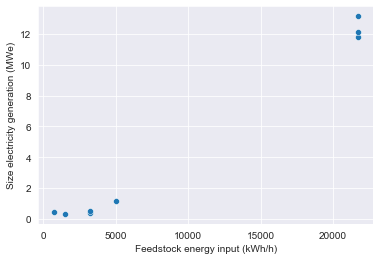

Electricity generation based on feedstock mass input


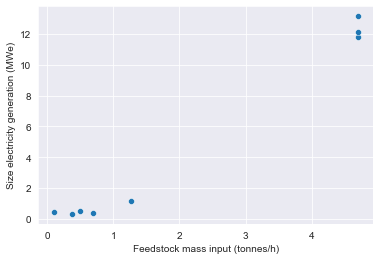

In [17]:
# Plot
print("Electricity generation based on feedstock energy input")
g_energy = sns.scatterplot(data=df_small, x="Feedstock energy input (kWh/h)", y="Size electricity generation (MWe)")
plt.show()
# Plot
print("Electricity generation based on feedstock mass input")
g_mass = sns.scatterplot(data=df_small, x="Feedstock mass input (tonnes/h)", y="Size electricity generation (MWe)")
plt.show()

# Regression model for small df

In [18]:
# Display inputs
x_small = np.array(df_small["Feedstock mass input (tonnes/h)"].values)
y_small = np.array(df_small["Size electricity generation (MWe)"].values)

print("Inputs:")
print("x input:", x_small)
print("y input:", y_small)
print()

# fit regression model
linear_regressor_small_df = LinearRegression().fit(X=x_small.reshape(-1,1), y=y_small)
R2_small = linear_regressor_small_df.score(X=x_small.reshape(-1,1), y=y_small)
print("R2 score for model trained on small dataset:", R2_small)

Inputs:
x input: [0.38028169 1.26760563 0.69444444 0.5        0.1        4.7
 4.7        4.7       ]
y input: [ 0.3222  1.154   0.4     0.5     0.419  13.16   11.83   12.15  ]

R2 score for model trained on small dataset: 0.9821490333214241


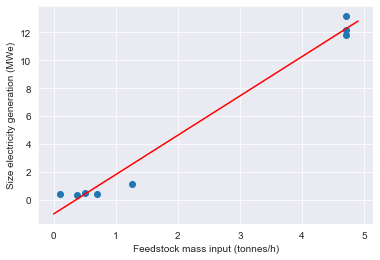

In [19]:
# Get predictions to plot
df_small_predictors = np.arange(start=0, stop=5, step=0.1)
df_small_predictions = linear_regressor_small_df.predict(df_small_predictors.reshape(-1,1))

# Plot regression model + data
fig, ax = plt.subplots()
ax.scatter(x_small, y_small)
ax.plot(df_small_predictors, df_small_predictions, color="red")
ax.set_xlabel("Feedstock mass input (tonnes/h)")
ax.set_ylabel("Size electricity generation (MWe)")

plt.show()

# Regression model for very small df (i.e. <2 tonnes/h)


In [31]:
# Display inputs
x_small_sub2 = np.array(df_small["Feedstock mass input (tonnes/h)"].values[df_small["Feedstock mass input (tonnes/h)"].values<2])
y_small_sub2 = np.array(df_small["Size electricity generation (MWe)"].values[df_small["Feedstock mass input (tonnes/h)"].values<2])

print("Inputs:")
print("x input:", x_small_sub2)
print("y input:", y_small_sub2)
print()

# fit regression model
linear_regressor_small_df_sub2 = LinearRegression().fit(X=x_small_sub2.reshape(-1,1), y=y_small_sub2)
R2_small_sub2 = linear_regressor_small_df.score(X=x_small_sub2.reshape(-1,1), y=y_small_sub2)
print("R2 score for model trained on small dataset:", R2_small_sub2)

Inputs:
x input: [0.38028169 1.26760563 0.69444444 0.5        0.1       ]
y input: [0.3222 1.154  0.4    0.5    0.419 ]

R2 score for model trained on small dataset: 0.744717748467087


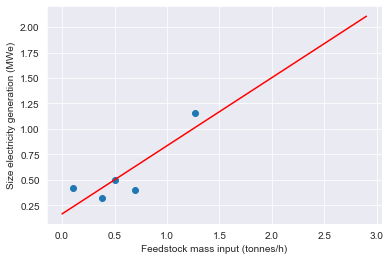

In [32]:
# Get predictions to plot
df_small_predictors_sub2 = np.arange(start=0, stop=3, step=0.1)
df_small_predictions_sub2 = linear_regressor_small_df_sub2.predict(df_small_predictors_sub2.reshape(-1,1))

# Plot regression model + data
fig, ax = plt.subplots()
ax.scatter(x_small, y_small)
ax.plot(df_small_predictors_sub2, df_small_predictions_sub2, color="red")
ax.set_xlabel("Feedstock mass input (tonnes/h)")
ax.set_ylabel("Size electricity generation (MWe)")

plt.show()

# Example regression model for complete df

In [21]:
# Display data
x_complete = np.array(df_complete["Feedstock mass input (tonnes/h)"].values)
y_complete = np.array(df_complete["Size electricity generation (MWe)"].values)

print("Inputs:")
print("x input:", x_complete)
print("y input:", y_complete)
print()

# fit regression model
linear_regressor_complete_df = LinearRegression().fit(X=x_complete.reshape(-1, 1), y=y_complete)
R2_complete = linear_regressor_complete_df.score(X=x_complete.reshape(-1, 1), y=y_complete)
print("R2 score for model trained on complete dataset:", R2_complete)

Inputs:
x input: [3.80281690e-01 1.26760563e+00 6.94444444e-01 5.00000000e-01
 1.00000000e-01 4.70000000e+00 4.70000000e+00 4.70000000e+00
 1.02859691e+02 7.28263971e+01 9.84328181e+01 9.84328181e+01]
y input: [3.222e-01 1.154e+00 4.000e-01 5.000e-01 4.190e-01 1.316e+01 1.183e+01
 1.215e+01 6.400e+02 6.410e+02 6.340e+02 4.990e+02]

R2 score for model trained on complete dataset: 0.9495210731996869


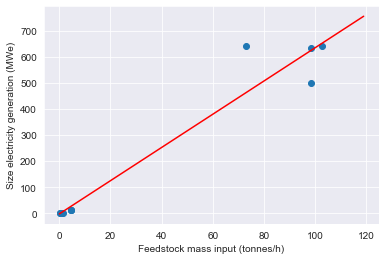

In [22]:
# Get predictions to plot
df_complete_predictors = np.arange(start=0, stop=120, step=1)
df_complete_predictions = linear_regressor_complete_df.predict(df_complete_predictors.reshape(-1, 1))

# Plot regression model + data
fig, ax = plt.subplots()
ax.scatter(x_complete, y_complete)
ax.plot(df_complete_predictors, df_complete_predictions, color="red")
ax.set_xlabel("Feedstock mass input (tonnes/h)")
ax.set_ylabel("Size electricity generation (MWe)")
plt.show()


Complete data set likely not suitable - data points are too spaced out - data points >400 MWe size all come from one data source and large coal gasification plants - so likely would not apply to my data

# Compare two models

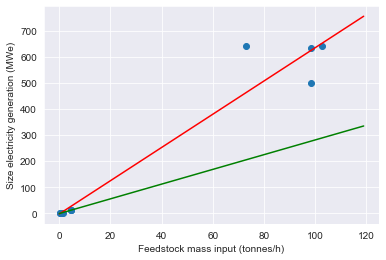

In [23]:
# Get predictions for whole set
df_complete_predictions = linear_regressor_complete_df.predict(df_complete_predictors.reshape(-1, 1))
df_small_predictions_on_whole_set = linear_regressor_small_df.predict(df_complete_predictors.reshape(-1, 1))

# Plot results
fig, ax = plt.subplots()
ax.scatter(x_complete, y_complete)
ax.plot(df_complete_predictors, df_complete_predictions, color="red")
ax.plot(df_complete_predictors, df_small_predictions_on_whole_set, color="green")
ax.set_xlabel("Feedstock mass input (tonnes/h)")
ax.set_ylabel("Size electricity generation (MWe)")
plt.show()


The two models are very different and clearly don't agree well with each other - just too much of a gap between data points

In [24]:
# R2 of small model across whole data set
R2 = linear_regressor_small_df.score(X=x_complete.reshape(-1,1), y=y_complete)
print("R2 score across all data points for model trained on small dataset:", R2)

R2 score across all data points for model trained on small dataset: 0.4946124617304445


Very poor performance - data points of very large systems (all coming from one source on coal gasification) are too different to rest of data

In [25]:
# Compare predictions for same data point
print("Small model prediction for a feedstock mass input of 1 tonne/hour:", float(linear_regressor_small_df.predict(np.array(1).reshape(-1, 1))))
print("Complete model prediction for a feedstock mass input of 1 tonne/hour:", float(linear_regressor_complete_df.predict(np.array(1).reshape(-1, 1))))

Small model prediction for a feedstock mass input of 1 tonne/hour: 1.800777315839576
Complete model prediction for a feedstock mass input of 1 tonne/hour: 3.973305693021305


Huge variation and complete model clearly predicts things very wrong.

# Export data to csv file

In [26]:
# Export small dataframe to csv file

project_root = get_project_root()
file_name = str(project_root) + r"\data\system_size_data.csv"
df_small.to_csv(file_name)  # save to data folder
df_small.to_csv("system_size_data.csv")  # save to local folder



In [27]:
# Example of how data should be loaded
pd.read_csv(file_name, index_col=0)

,Size electricity generation (MWe),Size gasifier (MWth),Feedstock mass input (tonnes/h),Feedstock energy input (kWh/h),Reference
Biomass gasifier with rankine cycle + all accessories - 1.5 MW biomass chemical energy,0.3222,NaN,0.380282,1500.000000,{'title': 'The influence of the size of the CH...
Biomass gasifier with rankine cycle + all accessories - 5 MW biomass chemical energy,1.1540,NaN,1.267606,5000.000000,{'title': 'The influence of the size of the CH...
Bubbling Fluidised Bed Gasifier,0.4000,0.4,0.694444,3182.870370,{'title': 'A techno-economic evaluation of a s...
Bubbling fluidised bed air gasifier + power production system + accessories,0.5000,0.5,0.500000,3222.222222,{'title': 'Fluidized bed gasification of a pac...
Biomass-based integrated gasification combined cycle with post-combustion CO2 recovery by potassium carbonate,0.4190,NaN,0.100000,702.777778,{'title': 'Biomass-based integrated gasificati...
Dinca - Biomass gasification power plant (w/o carbon capture),13.1600,NaN,4.700000,21710.083333,{'title': 'CO2 capture from syngas generated b...
Dinca - Biomass gasification power plant (with carbon capture),11.8300,NaN,4.700000,21710.083333,{'title': 'CO2 capture from syngas generated b...
Dinca - Biomass gasification power plant (with carbon capture and steam recovery),12.1500,NaN,4.700000,21710.083333,{'title': 'CO2 capture from syngas generated b...
